In [16]:
%precision 4
import numpy as np
import networkx as nx

In [17]:
n=4
stores_adj = np.zeros((n,n))

In [18]:
stores_adj[0,1]=0.1
stores_adj[0,2]=0.2
stores_adj[2,3]=0.1

In [19]:
print(stores_adj)

[[0.  0.1 0.2 0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.1]
 [0.  0.  0.  0. ]]


In [20]:
stores = nx.from_numpy_matrix(stores_adj, create_using=nx.MultiDiGraph)

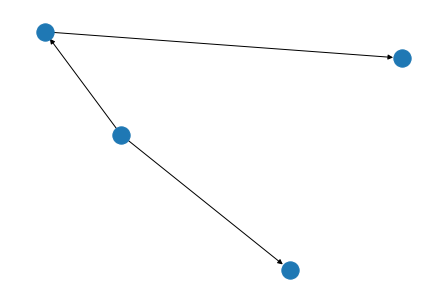

In [21]:
nx.draw(stores)

In [22]:
stores_path = []
for s1 in stores:
    for s2 in stores:
        if s1 == s2:
            continue
        for p in nx.all_simple_paths(stores, s1, s2):
            if p:
                stores_path.append(p)

In [23]:
print(stores_path)

[[0, 1], [0, 2], [0, 2, 3], [2, 3]]


In [24]:
import math

In [25]:
eds = {}
for p in stores_path:
    eds_p = 1
    for i, u in enumerate(p[:-1]):
        v = p[i+1]
        path_prob = stores[u][v][0]['weight']
        eds_p = eds_p * path_prob
    #Assumption: this is the only path! -- otherwise, mean?
    # What would the shortest path yield in the first place?
    eds[(p[0],p[-1])] = -1 * math.log(eds_p)

In [26]:
print(eds)

{(0, 1): 2.3025850929940455, (0, 2): 1.6094379124341003, (0, 3): 3.912023005428146, (2, 3): 2.3025850929940455}
